<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2.7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

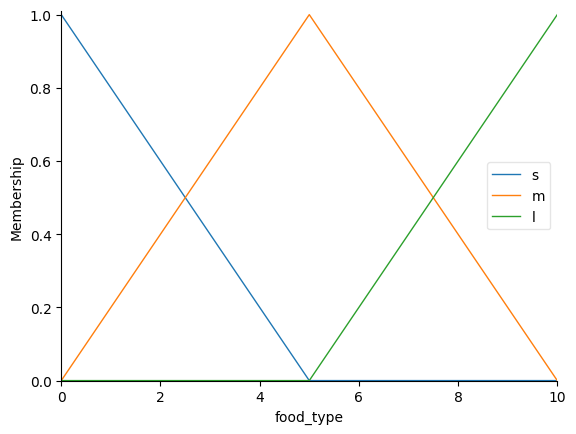

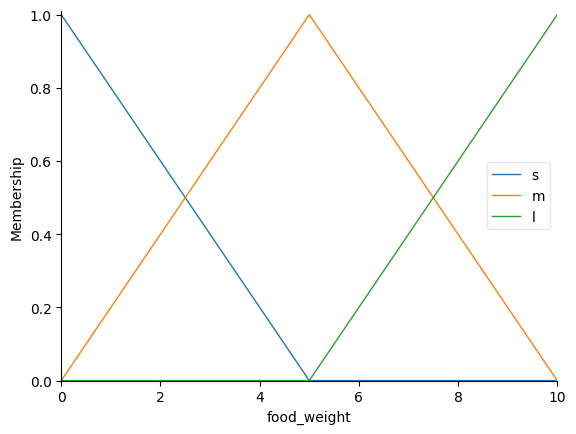

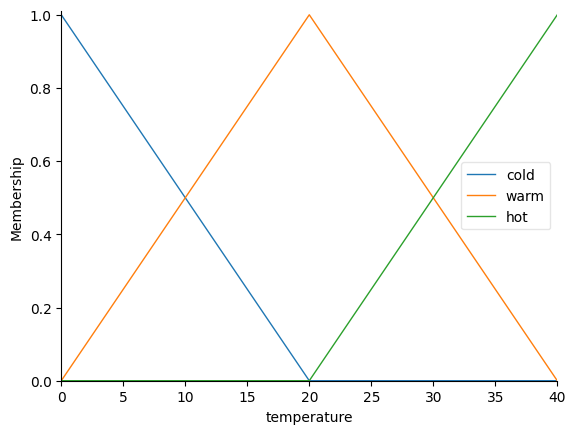

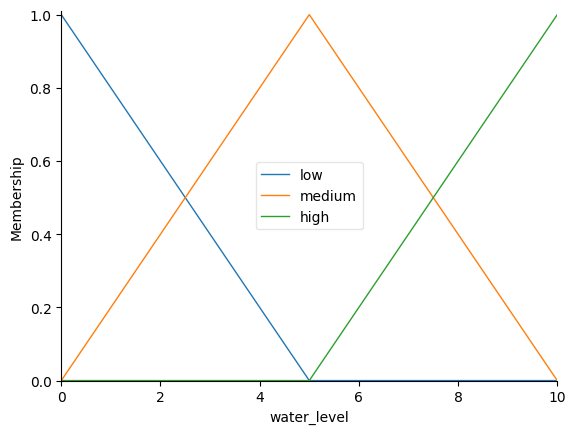

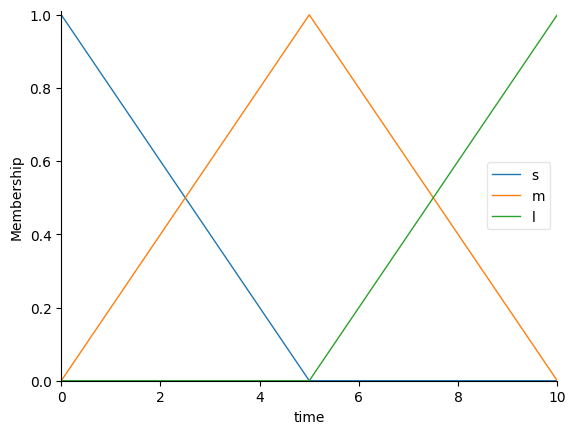

In [27]:
#2.7 Noi dien
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food_type=ctrl.Antecedent(np.arange(0,10.1,0.1),'food_type')
food_weight=ctrl.Antecedent(np.arange(0,10.1,0.1),'food_weight')
temperature=ctrl.Antecedent(np.arange(0,40.1,0.1),'temperature')
water_level=ctrl.Antecedent(np.arange(0,10.1,0.1),'water_level')
time=ctrl.Consequent(np.arange(0,10.1,0.1),'time')
food_type['s']=fuzz.trimf(food_type.universe,[0,0,5])
food_type['m']=fuzz.trimf(food_type.universe,[0,5,10])
food_type['l']=fuzz.trimf(food_type.universe,[5,10,10])
food_weight['s']=fuzz.trimf(food_weight.universe,[0,0,5])
food_weight['m']=fuzz.trimf(food_weight.universe,[0,5,10])
food_weight['l']=fuzz.trimf(food_weight.universe,[5,10,10])
temperature['cold']=fuzz.trimf(temperature.universe,[0,0,20])
temperature['warm']=fuzz.trimf(temperature.universe,[0,20,40])
temperature['hot']=fuzz.trimf(temperature.universe,[20,40,40])
water_level['low']=fuzz.trimf(water_level.universe,[0,0,5])
water_level['medium']=fuzz.trimf(water_level.universe,[0,5,10])
water_level['high']=fuzz.trimf(water_level.universe,[5,10,10])
time['s']=fuzz.trimf(time.universe,[0,0,5])
time['m']=fuzz.trimf(time.universe,[0,5,10])
time['l']=fuzz.trimf(time.universe,[5,10,10])
food_type.view()
food_weight.view()
temperature.view()
water_level.view()
time.view()

Time: 5.081871345029238


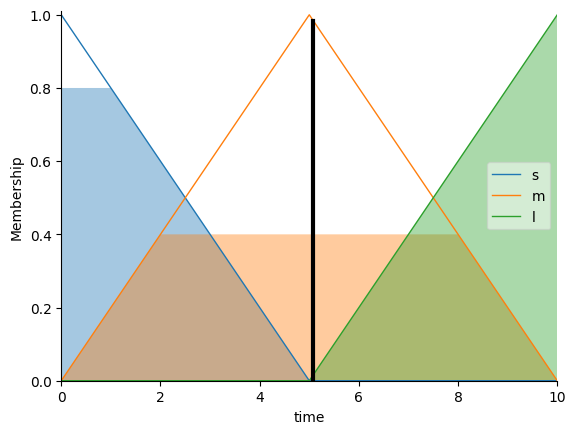

In [28]:
rule1=ctrl.Rule(food_type['s']|food_weight['s'],time['s'])
rule2=ctrl.Rule(food_type['m']|food_weight['m'],time['m'])
rule3=ctrl.Rule(food_type['l']|food_weight['l'],time['l'])
rule4=ctrl.Rule(temperature['cold']|water_level['low'],time['s'])
rule5=ctrl.Rule(temperature['warm']|water_level['medium'],time['m'])
rule6=ctrl.Rule(temperature['hot']|water_level['high'],time['l'])
rule7=ctrl.Rule(food_type['l']|food_weight['l']|temperature['cold']|water_level['low'],time['s'])
rule8=ctrl.Rule(food_type['m']|food_weight['m']|temperature['warm']|water_level['medium'],time['m'])
rule9=ctrl.Rule(food_type['s']|food_weight['s']|temperature['hot']|water_level['high'],time['l'])
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['food_type']=1
control_sim.input['food_weight']=1
control_sim.input['temperature']=40
control_sim.input['water_level']=2
control_sim.compute()
print(f"Time: {control_sim.output['time']}")
time.view(sim=control_sim)